<a href="https://colab.research.google.com/github/KillerGlass/classifica-o-binaria-em-pytroch/blob/main/Classifica%C3%A7%C3%A3o_Binaria_Brest_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importação das bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score #matriz de confusão

In [ ]:
import torch
torch.__version__


'1.9.0+cu111'

In [ ]:
import torch.nn as nn #pacote de redes neurais

# Etapa 2: Base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
prev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learnig/Bases/entradas_breast.csv')
target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learnig/Bases/saidas_breast.csv')

In [ ]:
prev.shape

(569, 30)

In [ ]:
prev.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
np.unique(target)

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


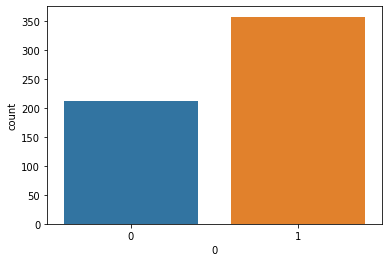

In [ ]:
sns.countplot(target['0'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(prev,
                                                    target,
                                                    test_size=0.25)

In [ ]:
x_train.shape

(426, 30)

# Etapa 3: Tranformação dos dados para tensores

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
#deve se tranforma os dados em tensores
#primeiro eh preciso converter para numpy array
def transform_type(dados):
  return torch.tensor(np.array(dados),dtype=torch.float)

In [ ]:
x_train = transform_type(x_train)
y_train = transform_type(y_train)

In [ ]:
type(x_train)

torch.Tensor

In [ ]:
#criando o dataset
dataset =  torch.utils.data.TensorDataset(x_train,y_train)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
#batch size defini o tamanho do lote a ser enviado a cada interação
train = torch.utils.data.DataLoader(dataset,batch_size=10, shuffle=True)

# Etapa 4: Construção do modelo

In [ ]:
# 30 neuronios na camada de entrada, pois temos 30 atributos
# duas camadas ocultas, com 16 neuronios
# na ultima camada, apenas 1 neuronio, sendo esse um problema de classificação
#para se saber o numero de neuronios a ser decedido nas camadas ocultas
#soma os neuronios de entrada com os de saida e dividi por 2
# 30 neuronios de entrada + 1 de saida / 2 = 15,5, arredondando 16

In [ ]:
classificador = nn.Sequential(
    nn.Linear(in_features=30,out_features=16),
    nn.ReLU(),#função de ativação entre camadas
    nn.Linear(in_features=16,out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16,out_features=1),
    nn.Sigmoid()#função de ativação na saida
)

In [ ]:
classificador.parameters#bias signifca criação de neuronios extras

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterio = nn.BCELoss()#funçao de perda

In [ ]:
#função de ativação, weight_decay é um parametro para aproximar o valor de aprendizado
#do gradiente, diminuindo seu valor
optimizer = torch.optim.Adam(classificador.parameters(),lr=0.001,weight_decay=0.0001)

# Etapa 5: Treinamento do modelo

In [ ]:
#keras utiliza o fit
#pytorch utliza um for manual
#batch_size eh de 10 e temos 426 registros, assim os ajustes de peso
#sera feito 42,6 vezes a cada epoca, ou seja essas serão as iterações

In [ ]:
for epoch in range(100):
  running_loss = 0

  for data in train:
    #inputs sao entradas, previsores. Labels as respostas reais
    inputs, labels = data
    #zerando os gradientes. Gradientes é a direção para onde vai ser feito os ajustes do peso
    optimizer.zero_grad()

    outputs = classificador(inputs)#classificador.forward é a mesma coisa, camada de aprendizado

    loss = criterio(outputs,labels)#calculando o erro

    #forward camada para frente q faz os caluculos, o backpropagation voltar para tras atualizando os pesos
    #backward atualiza os pesos
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  
  #a divisao ocorre para ter uma proporção de erro
  print("Epocas: {} | Loss: {:.5f}".format(epoch+1,running_loss/len(train)))




Epocas: 1 | Loss: 0.20397
Epocas: 2 | Loss: 0.17628
Epocas: 3 | Loss: 0.31377
Epocas: 4 | Loss: 0.17958
Epocas: 5 | Loss: 0.21617
Epocas: 6 | Loss: 0.18558
Epocas: 7 | Loss: 0.26513
Epocas: 8 | Loss: 0.20045
Epocas: 9 | Loss: 0.17075
Epocas: 10 | Loss: 0.25806
Epocas: 11 | Loss: 0.17693
Epocas: 12 | Loss: 0.21039
Epocas: 13 | Loss: 0.17759
Epocas: 14 | Loss: 0.18450
Epocas: 15 | Loss: 0.17098
Epocas: 16 | Loss: 0.15548
Epocas: 17 | Loss: 0.16413
Epocas: 18 | Loss: 0.18054
Epocas: 19 | Loss: 0.16007
Epocas: 20 | Loss: 0.17021
Epocas: 21 | Loss: 0.15464
Epocas: 22 | Loss: 0.19277
Epocas: 23 | Loss: 0.17958
Epocas: 24 | Loss: 0.22267
Epocas: 25 | Loss: 0.18797
Epocas: 26 | Loss: 0.15500
Epocas: 27 | Loss: 0.17337
Epocas: 28 | Loss: 0.15709
Epocas: 29 | Loss: 0.21127
Epocas: 30 | Loss: 0.14801
Epocas: 31 | Loss: 0.16485
Epocas: 32 | Loss: 0.17852
Epocas: 33 | Loss: 0.17664
Epocas: 34 | Loss: 0.16889
Epocas: 35 | Loss: 0.14063
Epocas: 36 | Loss: 0.17311
Epocas: 37 | Loss: 0.16739
Epocas: 38

# Etapa 6: Validação dos *pesos*

In [ ]:
#aprendizado de uma rede neural é a escolha dos melhores pesos

In [ ]:
params = list(classificador.parameters())
params

[Parameter containing:
 tensor([[-1.0512e-01,  1.0203e-02, -2.1697e-01,  9.8775e-02, -1.0516e-01,
           7.7038e-02,  3.6920e-01, -2.8992e-01, -3.6031e-01,  2.6285e-01,
           2.7225e-02,  1.0517e-01,  8.8305e-02,  6.7382e-02,  5.7505e-03,
          -3.0764e-01, -2.6443e-01, -2.5316e-01,  5.0114e-01,  1.8472e-01,
          -5.2942e-01,  8.5157e-02, -1.7406e-01,  8.0123e-02, -9.2698e-02,
          -5.5577e-02, -1.6607e-01, -1.9344e-01, -3.0759e-02,  2.7663e-01],
         [-3.6154e-02, -1.2858e-01,  2.0944e-01,  1.2281e-01, -2.6734e-02,
           2.0003e-01,  2.9778e-02,  6.1997e-02,  2.2707e-01, -4.4835e-03,
           1.4191e-02, -5.8470e-02,  1.3047e-01,  7.9025e-02, -1.6688e-02,
          -5.9752e-03,  4.0820e-01,  2.0353e-01,  5.1408e-01, -1.9351e-01,
           1.6715e-01, -3.0923e-01, -2.7031e-02, -1.2323e-01, -2.4949e-01,
          -1.0567e-01, -2.1590e-01,  1.6212e-01,  1.5927e-01, -3.5946e-01],
         [ 1.1285e-01,  3.7720e-01, -4.1670e-02, -1.2636e-01,  9.6187e-03,


In [ ]:
pesos = params[0]
pesos.shape
#esses sao os pesos da camada de entrada para camada de oculta

torch.Size([16, 30])

In [ ]:
bias = params[1]
bias.shape
#sao os pesos de uma so camada

torch.Size([16])

In [ ]:
pesos1 = params[2]
pesos1.shape
#esses sao os pesos da camada oculta para camada oculta

torch.Size([16, 16])

# Etapa 7: Avaliação do modelo

In [ ]:
#colocando em modo de avaliação
#gradiente e dropout sao desligados
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
x_test = transform_type(x_test)

In [ ]:
type(x_test)

torch.Tensor

In [ ]:
previsoes = classificador(x_test)

In [ ]:
#definir um limiar para classificação, se maior que 0.5 eh verdadeiro
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
taxa_acerto = accuracy_score(y_test,previsoes)
taxa_acerto

0.9090909090909091

In [ ]:
matriz = confusion_matrix(y_test,previsoes)

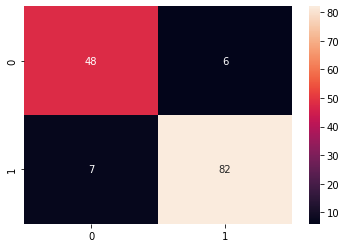

In [ ]:
sns.heatmap(matriz,annot=True);